In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the images
image1 = cv.imread('image1.jpg',1)
image2 = cv.imread('image2.jpg',1)
image3 = cv.imread('image3.jpg',1)

# Converting from BGR to RGB for CT
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

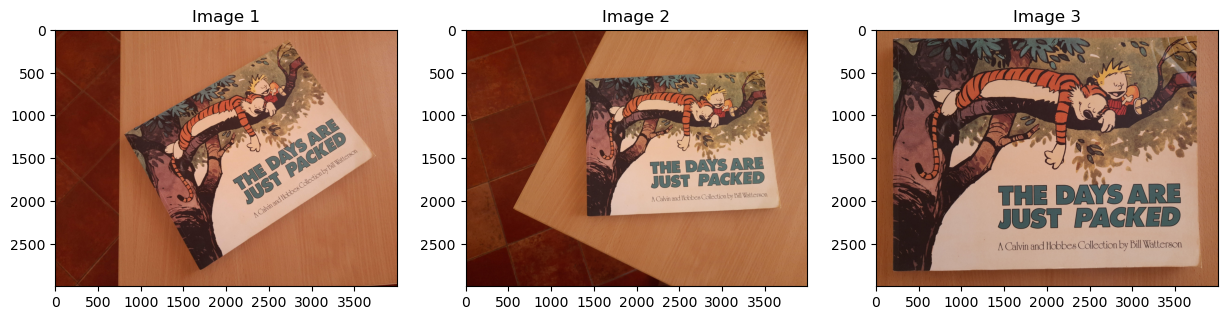

In [3]:
#Plotting the images
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1')

axs[1].imshow(image2)
axs[1].set_title("Image 2")

axs[2].imshow(image3)
axs[2].set_title("Image 3")
plt.show()

### 1. a) 
The coordinates of 4 corners of image1 and image2 are estimated by moving the cursor over them in Microsoft Paint. The 4 corners of the book of both image1 and image2 as the 4 points of correspondence.

In [4]:
# pt1 corresponds to the 4 points in image1 and pt2 to points in image2 respectively
pt1 = np.array([[809, 1227], [2727, 125], [1695, 2811], [3747, 1477]])
pt2 = np.array([[1395, 585], [3485, 477], [1419, 2179], [3683, 2087]])

### 1. b) 
Using DLT algorithm to compute homography from scratch

In [5]:
# function which creates A_i's from points of correspondence 
def calc_rows(x_i, x_i_d):
    r1 = [0, 0, 0, -1 * x_i[0], -1 * x_i[1], -1 * x_i[2], x_i_d[1] * x_i[0], x_i_d[1] * x_i[1], x_i_d[1] * x_i[2]]
    r2 = [1 * x_i[0], 1 * x_i[1], 1 * x_i[2], 0, 0, 0, -x_i_d[0] * x_i[0], -x_i_d[0] * x_i[1], -x_i_d[0] * x_i[2]]
    return(r1, r2)

In [6]:
# source points and destination points are pt1 and pt2 respectively
pt_src = pt1
pt_dest = pt2

In [7]:
# creating A from the 4 points of correspondence
A = []
for i in range(4):
    tmp_i = list(pt_src[i]) + [1]
    tmp_j = list(pt_dest[i]) + [1]
    r_i, r_j = calc_rows(tmp_i, tmp_j)
    A.append(r_i)
    A.append(r_j)
    
A = np.array(A)

# Calculating Singular Value Decomposition
u, s, v = np.linalg.svd(A)

# Right singular vector corresponding to the smallest singular value (last row of V transpose)
req_vec = v[-1, ]

# Reshaping to find the homography
h1 = req_vec.reshape((3,3))

In [8]:
# Printing the homography
print("The matrix corresponding to homography is given by:")
print(h1)

The matrix corresponding to homography is given by:
[[-5.01005275e-04  2.52506311e-04 -8.59643300e-01]
 [-2.71643408e-04 -5.63710672e-04  5.10893569e-01]
 [ 1.63974067e-08 -2.14013316e-08 -6.71688021e-04]]


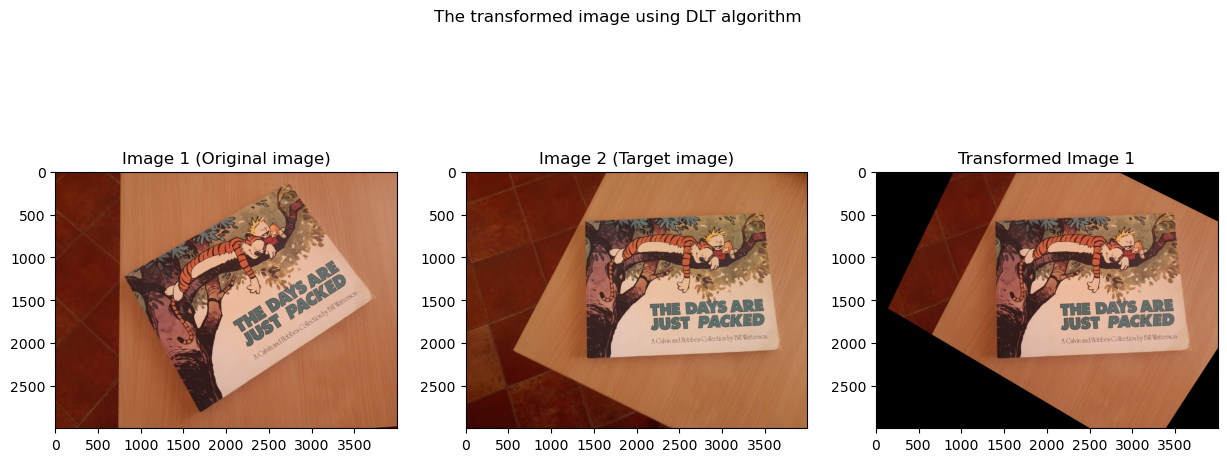

In [9]:
# applying the homography to the image and transforming it
manual_correct = cv.warpPerspective(image1, h1, (image2.shape[1],image2.shape[0]))

# displaying the transformed image
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1 (Original image)')

axs[1].imshow(image2)
axs[1].set_title("Image 2 (Target image)")

axs[2].imshow(manual_correct)
axs[2].set_title("Transformed Image 1")

plt.suptitle("The transformed image using DLT algorithm")
plt.show()

### 1. c) 
Using OpenCV's findHomography function

In [10]:
# computing the homography using the findHomography function
h, status = cv.findHomography(pt_src, pt_dest)

# displaying the homography
print("The matrix corresponding to homography is given by:")
print(h)

The matrix corresponding to homography is given by:
[[ 7.45889846e-01 -3.75927965e-01  1.27982527e+03]
 [ 4.04419015e-01  8.39244790e-01 -7.60611405e+02]
 [-2.44122363e-05  3.18620117e-05  1.00000000e+00]]


In [11]:
# We show that both the homography matrices are just a scalar multiple of each other

# Printing the homography obtained using the DLT algorithm
print("The matrix correspnding to homography obtained using DLT:")
print(h1)
print("")

# Printing the other homography after scalar multiplication
print("Multiplying the homography found using findHomography function with the (3,3)th element of the homography obtained using the DLT algorithm:")
print(h1[2,2] * h)

The matrix correspnding to homography obtained using DLT:
[[-5.01005275e-04  2.52506311e-04 -8.59643300e-01]
 [-2.71643408e-04 -5.63710672e-04  5.10893569e-01]
 [ 1.63974067e-08 -2.14013316e-08 -6.71688021e-04]]

Multiplying the homography found using findHomography function with the (3,3)th element of the homography obtained using the DLT algorithm:
[[-5.01005275e-04  2.52506311e-04 -8.59643300e-01]
 [-2.71643408e-04 -5.63710672e-04  5.10893569e-01]
 [ 1.63974067e-08 -2.14013316e-08 -6.71688021e-04]]


### Hence both homograhies are scalar multiples of each other.

In [12]:
# Distance between the homographies
print("The distance between the 2 homography matrices as norm of the difference of the 2 homographies approxmiated to 2 decimal places: ", np.round(np.linalg.norm(np.subtract(h1[2,2]*h, h1), 2), 2))

The distance between the 2 homography matrices as norm of the difference of the 2 homographies approxmiated to 2 decimal places:  0.0


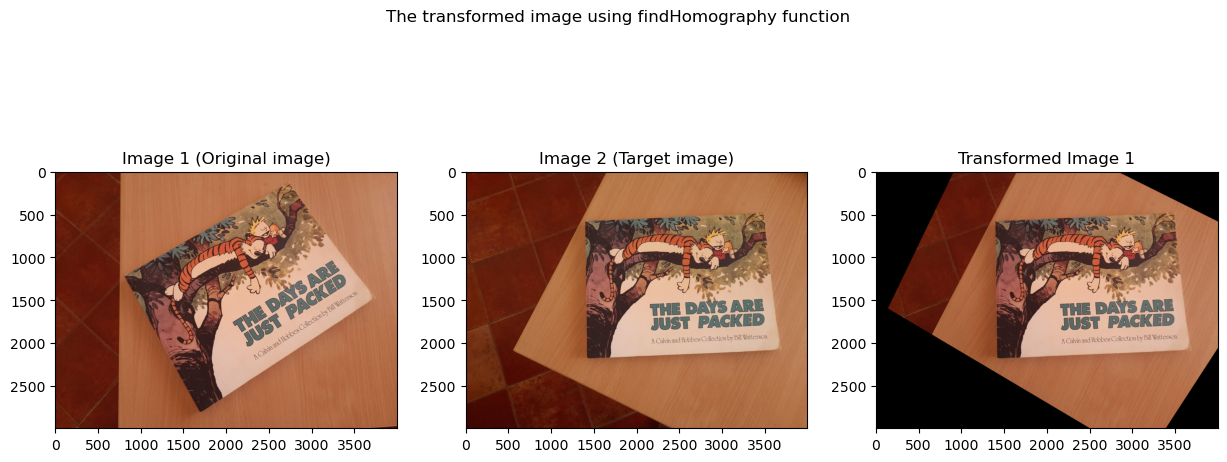

In [13]:
# applying the homography to the image and transforming it
inbuilt_correct = cv.warpPerspective(image1, h, (image2.shape[1],image2.shape[0]))

# displaying the transformed image
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1 (Original image)')

axs[1].imshow(image2)
axs[1].set_title("Image 2 (Target image)")

axs[2].imshow(inbuilt_correct)
axs[2].set_title("Transformed Image 1")

plt.suptitle("The transformed image using findHomography function")
plt.show()

### We can see from above that the 2 transformations using findHomography function and by implementing DLT algorithm from scratch yield similar results. We have already shown that the homographies obtained are essentially the same, hence the transformed images also resemble each other.

### 1. d) 
A homography transforms the plane defined by the 4 points of correspondence of the source image and aligns it to fit the plane of the target image. We observe that there are dark regions on the four corners of the above transformed images.This is because, points which are not on the plane of transformation will be not be aligned by the homography 

### 2. 
Straighten image 1:

In [14]:
# Source points are the 4 corners of the book from image1 and destination points are the 
# 4 corners of a blank image of width = 3000 and height = 2300 i.e. aspect ratio 30/23
pts_src = np.array([[809, 1227], [2727, 125], [1695, 2811], [3747, 1477]])
pts_dest = np.array([[0, 0], [3000, 0], [0, 2300], [3000, 2300]])

# making the A matrix
A = []
for i in range(4):
    temp_i = list(pts_src[i]) + [1]
    temp_j = list(pts_dest[i]) + [1]
    r_i, r_j = calc_rows(temp_i, temp_j)
    A.append(r_i)
    A.append(r_j)
    
A = np.array(A)

# Calculating Singular Value Decomposition
u, s, v = np.linalg.svd(A)

# right sinuglar vector corresponding to lowest singular value
req = v[-1, ]

# reshaping to find the homography
h = req.reshape((3,3))

In [15]:
# displaying the homography
print("The matrix corresponding to homography is given by:")
print(h)

The matrix corresponding to homography is given by:
[[ 5.32845495e-04 -2.98043629e-04 -6.53724725e-02]
 [ 3.38882808e-04  5.89815994e-04 -9.97860416e-01]
 [ 2.11695329e-09  3.30546207e-08  4.40242487e-04]]


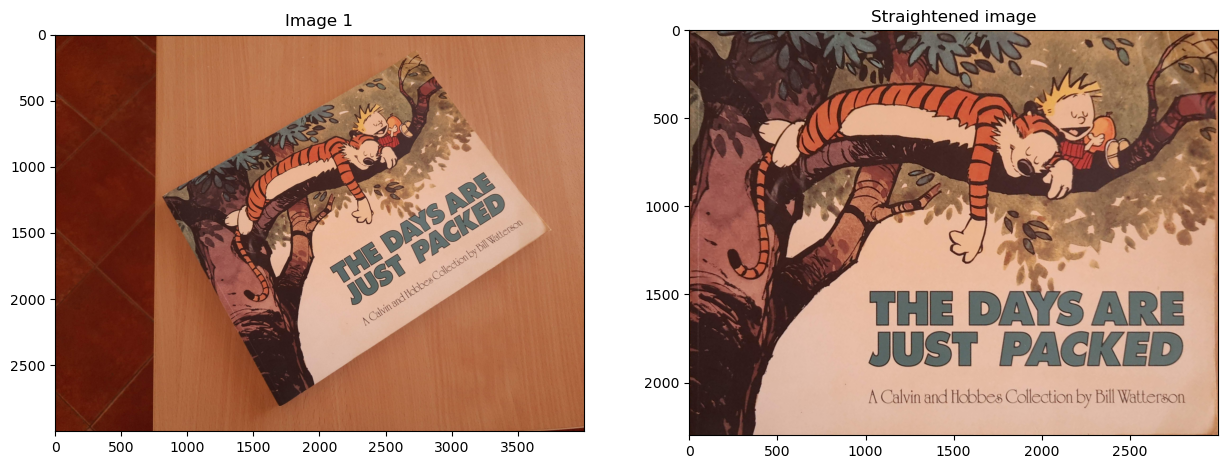

In [16]:
# applying the homography to the image and transforming it
im_straight = cv.warpPerspective(image1, h, (3000, 2300))

# displaying the transformed image
fig, axs = plt.subplots(1,2, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1')

axs[1].imshow(im_straight)
axs[1].set_title("Straightened image")
plt.show()

### 3. A few use cases of homography

### Case 1: Perspective correction
We adjust the images to look like the desired image by choosing points of correspondence as shown above in 1.b and 1.c

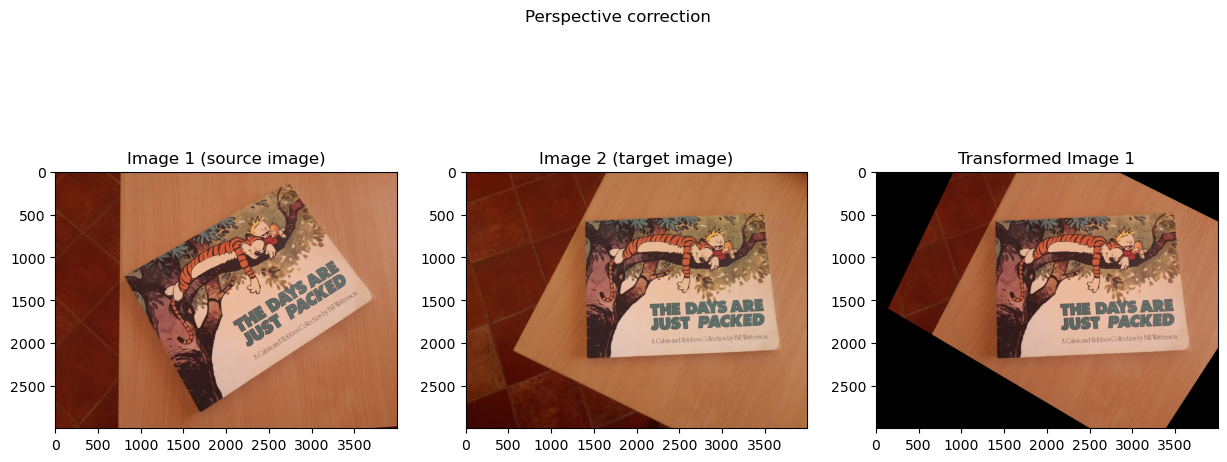

In [17]:
# displaying the transformed image
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1 (source image)')

axs[1].imshow(image2)
axs[1].set_title("Image 2 (target image)")

axs[2].imshow(inbuilt_correct)
axs[2].set_title("Transformed Image 1")

plt.suptitle("Perspective correction")
plt.show()

### Case 2: Extraction and magnification of part of an image: 
We can extract a part of the image and post straightening, display it as a new image, as seen above in 2.

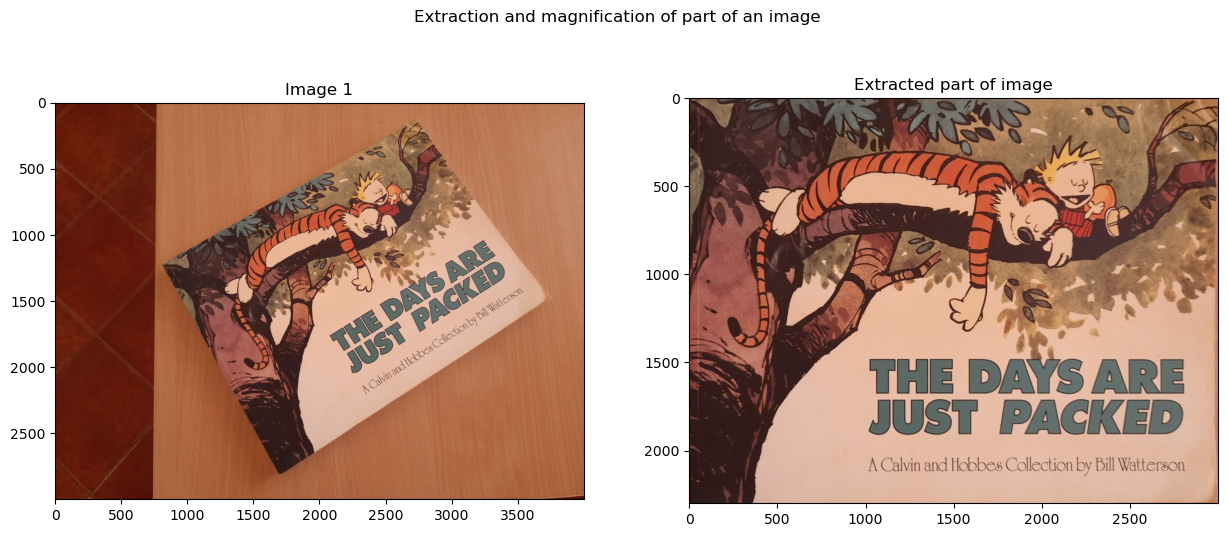

In [18]:
# displaying the transformed image
fig, axs = plt.subplots(1,2, figsize = (15, 6))
axs[0].imshow(image1)
axs[0].set_title('Image 1')

axs[1].imshow(im_straight)
axs[1].set_title("Extracted part of image")

plt.suptitle("Extraction and magnification of part of an image")
plt.show()

### iii) Case 3: Changing part of an image with another image
We take an image of Times Square, and replace the billboard on the left hand side with the Calvin and Hobbes book cover as is illustrated below.

In [19]:
# Parsing in Times Square image
times_img = cv.imread('times-square.jpg', 1)
times_img = cv.cvtColor(times_img, cv.COLOR_BGR2RGB)

In [20]:
# Choosing the points of correspondence to be the 4 corners of the billboard 
pt_src = np.array([[0, 0], [3000, 0], [0, 2300], [3000, 2300]])
pt_dest = np.array([[116,217], [282,361], [35,334], [248,445]])

# creating the A matrix
A = []
for i in range(4):
    temp_i = list(pt_src[i]) + [1]
    temp_j = list(pt_dest[i]) + [1]
    r_i, r_j = calc_rows(temp_i, temp_j)
    A.append(r_i)
    A.append(r_j)
    
A = np.array(A)

# Calculating Singular Value Decomposition
u, s, v = np.linalg.svd(A)

# right singular vector corresponding to the smallest singular value
req = v[-1, ]

# reshaping to get the homography
h = req.reshape((3,3))

img_billboard = cv.warpPerspective(im_straight, h, (times_img.shape[1],times_img.shape[0]))

In [21]:
# Creating the modified image
modified_img = np.zeros((times_img.shape[0], times_img.shape[1], times_img.shape[2]), np.uint8)
for i in range(times_img.shape[0]):
    for j in range(times_img.shape[1]):
        for k in range(times_img.shape[2]):
            if img_billboard[i][j][k] != 0:
                modified_img[i][j][k] = img_billboard[i][j][k]
            else:
                modified_img[i][j][k] = times_img[i][j][k]

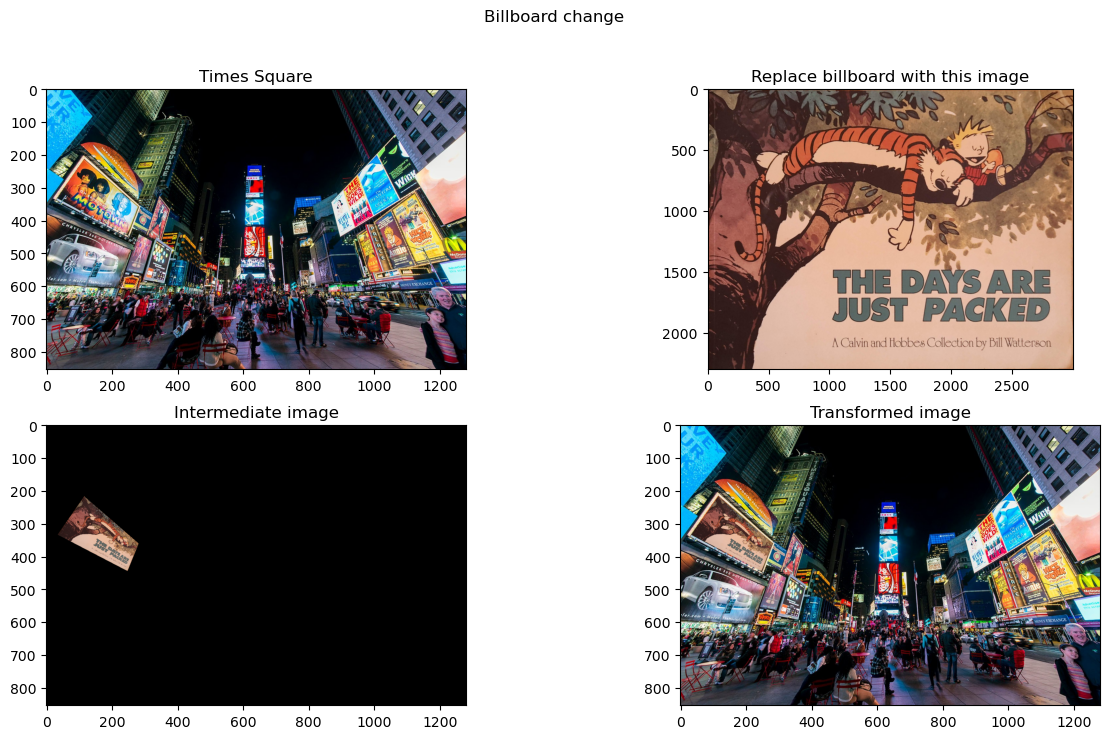

In [22]:
# displaying the image    
fig, axs = plt.subplots(2,2, figsize = (15, 8))
axs[0,0].imshow(times_img)
axs[0,0].set_title('Times Square')
axs[0,1].imshow(im_straight)
axs[0,1].set_title("Replace billboard with this image")
axs[1,0].imshow(img_billboard)
axs[1,0].set_title("Intermediate image")
axs[1,1].imshow(modified_img)
axs[1,1].set_title("Transformed image")
plt.suptitle("Billboard change")
plt.show()